# 作业1：Numpy练习

本次作业主要对Python中的矩阵运算库Numpy进行练习。如遇到不清楚的函数或主题，可以查阅[官方文档](https://numpy.org/doc/stable/user/index.html)或利用搜索引擎寻求帮助。

### 基础知识

本节对Numpy进行简要介绍，没有实际的题目，可直接运行每一个单元格。

首先导入Numpy包：

In [3]:
import numpy as np

利用Numpy可以方便地创建向量和矩阵：

In [2]:
vec = np.array([1.0, 2.0, 5.0])
print(vec)

[1. 2. 5.]


In [3]:
mat = np.array([[1.0, 2.0, 2.0], [3.0, 5.0, 4.5]])
print(mat)

[[1.  2.  2. ]
 [3.  5.  4.5]]


In [4]:
vec = np.linspace(start=1.0, stop=5.0, num=12)
print(vec)

[1.         1.36363636 1.72727273 2.09090909 2.45454545 2.81818182
 3.18181818 3.54545455 3.90909091 4.27272727 4.63636364 5.        ]


In [5]:
mat = np.reshape(vec, (3, 4))
print(mat)

[[1.         1.36363636 1.72727273 2.09090909]
 [2.45454545 2.81818182 3.18181818 3.54545455]
 [3.90909091 4.27272727 4.63636364 5.        ]]


Python中下标是从0开始的，请一定要记住这一点，否则会造成很多逻辑错误。

In [6]:
print(vec[0])
print(vec[2])
print(mat[1, 1])

1.0
1.7272727272727273
2.8181818181818183


负数的下标表示从尾部往前数：

In [ ]:
print(vec[-1])
print(vec[-2])
print(mat[1, -1])

可以用冒号选取向量中的一段范围，格式为`x[start:end]`，选出的元素包含`x[start]`，不包含`x[end]`。

In [20]:
print(vec[1:3])

[1.36363636 1.72727273]


In [ ]:
print(mat[:, :2])

在编写函数时，经常需要各种测试数据，此时可以用Numpy来生成各类随机数。在需要用到随机数之前，一定要先设置随机数种子，以使结果可重复。

In [ ]:
np.random.seed(123)

生成均匀分布随机数：

In [ ]:
unif = np.random.uniform(low=0.0, high=1.0, size=5)
print(unif)

正态分布随机数：

In [ ]:
norm = np.random.normal(loc=0.0, scale=1.0, size=(2, 5))
print(norm)

Numpy提供了许多数学函数对向量和矩阵进行操作：

In [ ]:
print(np.exp(norm))

In [ ]:
print(np.log(unif))

也可以对向量和矩阵进行汇总：

In [ ]:
np.sum(unif)

In [ ]:
np.mean(norm)

汇总可以按行或者按列进行，这由`axis`参数决定。0表示运算时第一个维度（行）在变化，1表示运算时第二个维度（列）在变化。
再次提醒，Python中以0表示第一个元素！

In [ ]:
np.mean(norm, axis=0)  # 对第一个维度（行标在变化）求均值

In [ ]:
np.var(norm, axis=1)  # 对第二个维度（列标在变化）求方差

### 第1题

(a) 生成10000个服从(0, 1)间均匀分布的随机数，赋值给变量`x`，并打印其**前10个**元素。

In [23]:
unif = np.random.uniform(low=0.0, high=1.0, size=10000)
print(unif[:9])

[0.51249741 0.14614323 0.41420303 0.56662    0.58398622 0.64319067
 0.48735484 0.53249195 0.70455652]


(b) 创建向量`y`，令其在数学上等于`y=-log(x)`，其中`log`为自然对数。打印`y`的**最后10个**元素。

In [28]:
y=np.log(unif)
y=-y
print(y[-10:])

[0.14253188 0.09450651 1.31840976 1.02966315 0.36000331 0.59591305
 0.55039112 0.108315   2.17437485 0.9977705 ]


(c) 查找在Python中绘制图形的方法，绘制`y`的直方图。

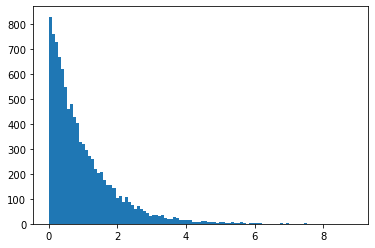

In [34]:
import matplotlib.pyplot as plt
plt.hist(y,bins=100,histtype="bar")
plt.show()

(d) 猜测或证明`y`服从什么分布，并简要说明理由。

指数分布

### 第2题

(a) 考虑Sigmoid函数 $$\sigma(x)=\frac{e^x}{1+e^x}$$

请在Python中编写一个函数`sigmoid(x)`，令其可以接收一个向量`x`，返回Sigmoid函数在`x`上的取值。

In [39]:
def sigmoid(z):
    return np.exp(z)/(1 + np.exp(z))

(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [40]:
x = np.array([-1000, -100, -10,0,10,100,1000])
print(sigmoid(x))

[0.00000000e+00 3.72007598e-44 4.53978687e-05 5.00000000e-01
 9.99954602e-01 1.00000000e+00            nan]


<ipython-input-39-708fc8a6bd0a>:2: RuntimeWarning: overflow encountered in exp
  return np.exp(z)/(1 + np.exp(z))
<ipython-input-39-708fc8a6bd0a>:2: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(z)/(1 + np.exp(z))


会出现警告，因为参数值inx很大时，exp(inx)可能会发生溢出

(c) 如果出现警告或错误，思考可能的原因是什么。（提示：Sigmoid函数真实的取值范围是多少？分子和分母的取值范围又是什么？是否可以对Sigmoid函数的表达式进行某种等价变换？）如果一切正常，可忽略此问题。

sigmoid函数的函数值应在0到1之间；可以等价变换为np.1/(1 + np.exp(-z))

(d) 请再次尝试编写`sigmoid(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。

In [8]:
from scipy.special import expit
def sigmoid(z):
    y=expit(x)
    return y

In [9]:
x = np.array([-1000, -100, -10,0,10,100,1000])
print(sigmoid(x))

[0.00000000e+00 3.72007598e-44 4.53978687e-05 5.00000000e-01
 9.99954602e-01 1.00000000e+00 1.00000000e+00]


### 第3题

(a) 考虑Softplus函数 $$\mathrm{softplus}(x)=\log(1+e^x)$$

请在Python中编写一个函数`softplus(x)`，令其可以接收一个向量`x`，返回Softplus函数在`x`上的取值。

In [48]:
def softplus(z):
    return np.log(1+np.exp(z))

(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [49]:
x = np.array([-1000, -100, -10,0,10,100,1000])
print(softplus(x))

[0.00000000e+00 0.00000000e+00 4.53988992e-05 6.93147181e-01
 1.00000454e+01 1.00000000e+02            inf]


<ipython-input-48-88f39d672f2c>:2: RuntimeWarning: overflow encountered in exp
  return np.log(1+np.exp(z))


(c) 如果出现警告或错误，参照第2题的方法，思考可能的原因是什么。如果一切正常，可忽略此问题。

(d) 请再次尝试编写`softplus(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。

In [4]:
def softplus(x):
    f = []
    for num in x:
        f.append(np.log(1+np.exp(num)))
    return f

In [6]:
x = np.array([-1000, -100, -10,0,10,100,1000])
print(softplus(x))

[0.0, 0.0, 4.5398899216870535e-05, 0.6931471805599453, 10.000045398899218, 100.0, inf]


<ipython-input-4-fffa9a85d712>:4: RuntimeWarning: overflow encountered in exp
  f.append(np.log(1+np.exp(num)))
